18287.0
0.0001388888888888889


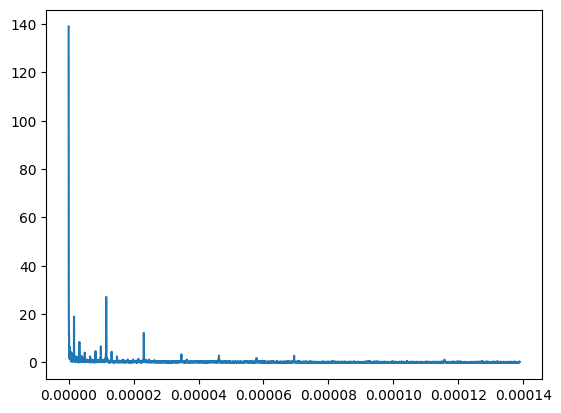

[4.55722046e-08 1.15753400e-05 3.03814697e-08 1.51907349e-08]


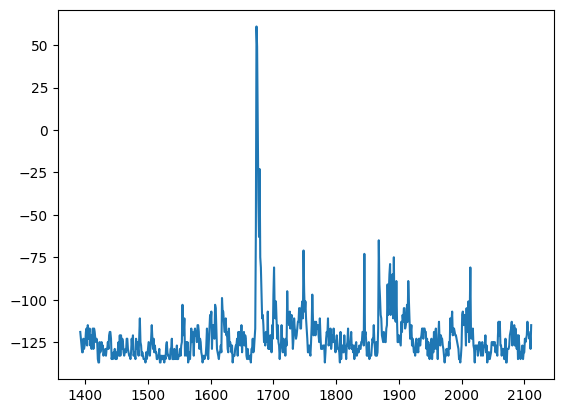

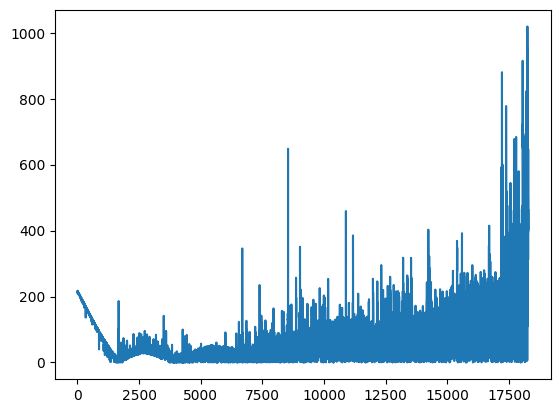

In [41]:
# ex1
# a)
# 1h = 3600s -> fs = 1 / 3600

ts = 3600
fs = 1 / 3600

# b)

import numpy as np

x = np.genfromtxt('Train.csv', delimiter=',')[1:][: , 2]

interval = (len(x) - 1) * ts # secunde
print(interval / 3600) # ore

# c)
max_freq = fs / 2 # 1 / 7200
print(max_freq)

# d)

N = len(x)
X = np.fft.fft(x)
X = np.abs(X / N)
X = X[: N // 2]

f = fs * np.linspace(0, N / 2, N //2) / N

import matplotlib.pyplot as plt
plt.plot(f, X)
plt.show()

# e)
# Prezinta o componenta continua deoarece magnitudinea 
# componentei de frecventa 0 este mai mare decat 0
x -= np.mean(x)
X = np.fft.fft(x)
X = np.abs(X / N)
X = X[: N // 2]

f = fs * np.linspace(0, N / 2, N //2) / N

# f)

max_components = f[np.argpartition(X, -4)[-4:]]
print(max_components)

# prima componenta = 1 / (3600 * 24) corespunde fenomenului de zi / noapte

# g)

# punctul 48 reprezinta o zi de luni, ora 00:00 in csv
start = 48 + 7 * 24 * 8
plt.plot(range(start, start + 30 * 24), x[start : start + 30 * 24])
plt.show()

# h)


# i)

def filterComponents(X, indices):
    for i in indices:
        X[i] = 0
        if i:
            X[-i] = 0
    return np.abs(np.fft.ifft(X))

